# Introduction to Scikit_Learn (sklearn)

This notebook demonstrates some of the most useful functions of the beautiful Scikit-Learn library.

What wer are going to cover:

0. An end-to-end Scikit-Learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problems
3. Fit the model/algorithm and use it to make predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together!

In [1]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 0. An end-to-end Scikit-Learn workflow

In [2]:
# 1. Get the data ready
import pandas as pd

heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# Create X (feature matrix)
X = heart_disease.drop("target", axis=1)

# Create y (labels)
y = heart_disease["target"]

In [4]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

# We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [5]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
clf.fit(X_train, y_train);

In [7]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
215,43,0,0,132,341,1,0,136,1,3.0,1,0,3
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3
237,60,1,0,140,293,0,0,170,0,1.2,1,2,3
272,67,1,0,120,237,0,1,71,0,1.0,1,0,2
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,62,0,0,150,244,0,1,154,1,1.4,1,0,2
129,74,0,1,120,269,0,0,121,1,0.2,2,1,2
31,65,1,0,120,177,0,1,140,0,0.4,2,0,3
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [8]:
# make a prediction
y_label = clf.predict(np.array([0, 2, 3, 4]))

ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [9]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
213,61,0,0,145,307,0,0,146,1,1.0,1,0,3
146,44,0,2,118,242,0,1,149,0,0.3,1,1,2
172,58,1,1,120,284,0,0,160,0,1.8,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
216,62,0,2,130,263,0,1,97,0,1.2,1,1,3
103,42,1,2,120,240,1,1,194,0,0.8,0,0,3
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2


In [10]:
y_preds = clf.predict(X_test)
y_preds

array([1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1], dtype=int64)

In [11]:
y_test

132    1
246    0
213    0
146    1
172    0
      ..
202    0
216    0
103    1
160    1
123    1
Name: target, Length: 61, dtype: int64

In [12]:
# 4. Evaluate the model on the training data and test data
clf.score(X_train, y_train)

1.0

In [13]:
clf.score(X_test,  y_test)

0.8852459016393442

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.89      0.91      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



In [15]:
confusion_matrix(y_test, y_preds)

array([[23,  4],
       [ 3, 31]], dtype=int64)

In [16]:
accuracy_score(y_test, y_preds)

0.8852459016393442

In [17]:
# 5. Improve a model
# Try different amount of n_estimators

np.random.seed(42)

for i in range(10, 100, 10):
    print(f"Trying to model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, y_test) * 100:.2f}%")
    print("")

Trying to model with 10 estimators...
Model accuracy on test set: 81.97%

Trying to model with 20 estimators...
Model accuracy on test set: 86.89%

Trying to model with 30 estimators...
Model accuracy on test set: 81.97%

Trying to model with 40 estimators...
Model accuracy on test set: 88.52%

Trying to model with 50 estimators...
Model accuracy on test set: 85.25%

Trying to model with 60 estimators...
Model accuracy on test set: 85.25%

Trying to model with 70 estimators...
Model accuracy on test set: 86.89%

Trying to model with 80 estimators...
Model accuracy on test set: 86.89%

Trying to model with 90 estimators...
Model accuracy on test set: 86.89%



In [18]:
# 6. Save a model and load it
import pickle

pickle.dump(clf, open("random_forest_model_1.pk1", "wb"))

In [19]:
loaded_model = pickle.load(open("random_forest_model_1.pk1", "rb"))
loaded_model.score(X_test, y_test)

0.8688524590163934

## 1. Getting data ready to be used with machine learning

Three main things we have to do:

    1. Split the data into features and labels (usually 'X' & 'Y')
    2. Filling (also called imputing) or disregarding missing values
    3. Converting non-numerical values to numerical values (also called feature encoding)

In [20]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
X = heart_disease.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [22]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [23]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [25]:
X.shape[0] * 0.8

242.4

In [26]:
242 + 61

303

In [27]:
len(heart_disease)

303

# 1.1 Make sure it's all numerical

In [28]:
car_sales = pd.read_csv("data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [29]:
car_sales["Doors"].value_counts()

4    856
5     79
3     65
Name: Doors, dtype: int64

In [30]:
len(car_sales)

1000

In [31]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [32]:
# Split into X/y
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [33]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Toyota'

In [34]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [35]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [36]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [37]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [38]:
# Let's refit the model
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

model.fit(X_train, y_train)

RandomForestRegressor()

In [39]:
model.score(X_test, y_test)

0.3235867221569877

### 1.2 What if there were missing values?

1. Fill them with some value (also known as imputation).
2. Remove the samples with missing data altogether.

In [40]:
# Import care sales missing data
car_sales_missing = pd. read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [41]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [42]:
# Create X & y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [43]:
# Let's try and convert our dat to numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

ValueError: Input contains NaN

#### Option 1: Fill missing data with Pandas

In [44]:
car_sales_missing["Doors"].value_counts()

4.0    811
5.0     75
3.0     64
Name: Doors, dtype: int64

In [45]:
# Fill the "Make" column
car_sales_missing["Make"].fillna("missing", inplace=True)

# Fill the "Colour" column
car_sales_missing["Colour"].fillna("missing", inplace=True)

# Fill the "Odometer (KM)" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

# Fill the "Doors" column
car_sales_missing["Doors"].fillna(4, inplace=True)

In [46]:
# Check our dataframe again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [47]:
# Remove rows iwth missing Price value
car_sales_missing.dropna(inplace=True)

In [48]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [49]:
len(car_sales_missing)

950

In [50]:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [51]:
# Let's try and convert our dat to numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Option 2: Fill missing values with Scikit-Learn

In [52]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [53]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [54]:
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [55]:
# Split into X & y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

# Split data into train and test
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [56]:
X.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [57]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_features),
    ("num_imputer", num_imputer, num_features)
])

# Transform the data
# Fill train and test values seperately
filled_X_train = imputer.fit_transform(X_train)
filled_X_test = imputer.transform(X_test)

# Check filled X_train
filled_X_train

array([['Honda', 'White', 4.0, 71934.0],
       ['Toyota', 'Red', 4.0, 162665.0],
       ['Honda', 'White', 4.0, 42844.0],
       ...,
       ['Toyota', 'White', 4.0, 196225.0],
       ['Honda', 'Blue', 4.0, 133117.0],
       ['Honda', 'missing', 4.0, 150582.0]], dtype=object)

In [58]:
# Get our transformed data array's back into DataFrame's
car_sales_filled_train = pd.DataFrame(filled_X_train, 
                                      columns=["Make", "Colour", "Doors", "Odometer (KM)"])

car_sales_filled_test = pd.DataFrame(filled_X_test,
                                     columns=["Make", "Colour", "Doors", "Odometer (KM)"])

# Check missing data in training set
car_sales_filled_train.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [59]:
car_sales_filled_train.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,71934.0
1,Toyota,Red,4.0,162665.0
2,Honda,White,4.0,42844.0
3,Honda,White,4.0,195829.0
4,Honda,Blue,4.0,219217.0


In [60]:
car_sales_filled_test.head()

,Make,Colour,Doors,Odometer (KM)
0,Toyota,Blue,4.0,99761.0
1,Toyota,Black,4.0,17975.0
2,Honda,Blue,4.0,197664.0
3,Nissan,Green,4.0,235589.0
4,Honda,Black,4.0,231659.0


In [61]:
car_sales_filled_test.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [62]:
# Now let's one hot encode the features with the same code as before 
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                 remainder="passthrough")

# Fill train and test values separately
transformed_X_train = transformer.fit_transform(car_sales_filled_train)
transformed_X_test = transformer.transform(car_sales_filled_test)

# Check transformed and filled X_train
transformed_X_train.toarray()

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 7.19340e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.62665e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 4.28440e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.96225e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.33117e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.50582e+05]])

In [63]:
# Now we've transformed X, let's see if we can fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

# Setup model
model = RandomForestRegressor()

# Make sure to use transformed (filled and one-hot encoded X data)
model.fit(transformed_X_train, y_train)
model.score(transformed_X_test, y_test)

0.21229043336119102

In [64]:
len(car_sales_filled_train), len(car_sales)

(760, 1000)

## 2. Choosing the right estimator/algorithm for our problem

Scikit-Learn uses estimator as another term for machine learning model or algorithm.

* Classification - predicting whether a sample is one thing or another
* Regression - predicting a number

Step 1- Check the Scikit_Learn machine learning map... https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### 2.1 Picking a machine learning model for a regression problem

In [65]:
# Import Boston housing dataset
from sklearn.datasets import load_boston
boston = load_boston()
boston;

In [66]:
boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [67]:
# How many samples?
len(boston_df)

506

In [68]:
# Let's try Ridge Regression model
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Create the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Ridge model
model = Ridge()
model.fit(X_train, y_train)

# Check the score of the Ridge model on test data
model.score(X_test, y_test)

0.6662221670168518

How do we improve this score?

What if Ridge wasn't working?

Let's refer back to the map... https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [69]:
# Let's try the Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor


# Setup random seed
np.random.seed(42)

# Create the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Evaluate the Random Forest Regressor
rf.score(X_test, y_test)

0.8654448653350507

In [70]:
# Check the Ridge model again
model.score(X_test, y_test)

0.6662221670168518

### 2.2 Choosing an estimator for a classification proglem

Let's go to the map... https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [71]:
haert_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [72]:
len(heart_disease)

303

Consulting the map and it says to try `LinearSVC`.

In [73]:
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate LinearSVC
clf = LinearSVC()
clf.fit(X_train, y_train)

# Evaluate the LinearSVC
clf.score(X_test, y_test)

C:\Users\huynh\Anaconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8688524590163934

In [74]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [75]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Random Forest Classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Evaluate the Random Forest Classifier
clf.score(X_test, y_test)

0.8524590163934426

Tidbit:
    
    1. If you have structured data, used enseble methods
    2. If you have unstructured data, use deep learning or transfer learning

In [76]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## 3. Fit the model/algorithm on our data and use it to make predictions

### 3.1 Fitting the model to the data

Different names for:
* `X` = features, features variables, data
* `y` = labels, targets, target variables

In [77]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Random Forest Classifier
clf = RandomForestClassifier()

# Fit the model to the data (training the machine learning model)
clf.fit(X_train, y_train)

# Evaluate the Random Forest Classifier (use the pattern the model has learned)
clf.score(X_test, y_test)

0.8524590163934426

In [78]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [79]:
y.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

### 3.2 Make predictions usings a machine learning model

2 ways to make predictions:
1. `predict()`
2. `predict_proba()`

In [80]:
# Use a trained modlel to make predicitons
clf.predict(np.array([1, 7, 8, 3, 4])) # this doesn't work

ValueError: Expected 2D array, got 1D array instead:
array=[1. 7. 8. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [81]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [82]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [83]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [84]:
# Compare predictions to truth labels to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [85]:
clf.score(X_test, y_test)

0.8524590163934426

In [86]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

Make preditions with `predict_proba()`

In [87]:
# predict_proba() returns probabilities of a classification label
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [88]:
# Let's predict() on the same data...
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [89]:
X_test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [90]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

`predict()` can also be used for regression models

In [91]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [92]:
y_preds[:10]

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

In [93]:
np.array(y_test[:10])

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

In [94]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.14754098360655737

## 4. Evaluating a machine learning model

Three ways to evaluate Scikit-Learn models/estimators:
1. Estimator `score` method
2. The `scoring` parameter
3. Problem-specific metric functions.

### 4.1 Evaluating a model with the score method

In [95]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

RandomForestClassifier()

In [96]:
clf.score(X_train, y_train)

1.0

In [97]:
clf.score(X_test, y_test)

0.8524590163934426

Let's do the same but for regression...

In [98]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# split into training the test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit model
model = RandomForestRegressor().fit(X_train, y_train)

In [99]:
model.score(X_test, y_test)

0.8654448653350507

### 4.2 Evaluating a model using the `scoring` parameter

In [100]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train);

In [101]:
clf.score(X_test, y_test)

0.8524590163934426

In [102]:
cross_val_score(clf, X, y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [103]:
cross_val_score(clf, X, y, cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [104]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_test, y_test)

# Take the mean of 5-fold cross-validation score
clf_corss_val_score = np.mean(cross_val_score(clf, X, y))

# Compare the two
clf_single_score, clf_corss_val_score

(0.8524590163934426, 0.8248087431693989)

In [105]:
# Default scoring parameter of classifier = mean accuracy
# clf.score()

In [106]:
# Scoring parameter set to None by default
cross_val_score(clf, X, y, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

**Accuracy**

In [107]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [108]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, y)

In [109]:
np.mean(cross_val_score)

0.8248087431693989

In [110]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) * 100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


**Area under the receiver operating characteristic curve (AUC/ROC)**

* Area under curve (AUC)
* ROC curve

ROC curves are a comparison of a model's true positive rate (tpr) versus a model false positive rate (fpr)

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative - moedl predicts 0 when truth is 1

In [111]:
# Create X_test... etc
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [112]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(X_train, y_train)

# Make predictions with probabilites
y_probs = clf.predict_proba(X_test)

y_probs[:10], len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [113]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [114]:
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

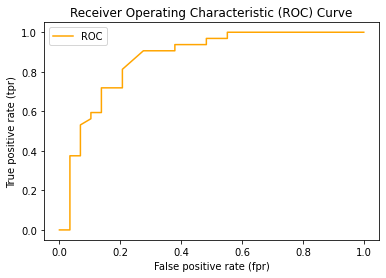

In [115]:
# Create a funciton for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr) and true positive rate (tpr) of a model.
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line wiht no predictive power (baseline)
    # plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [116]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

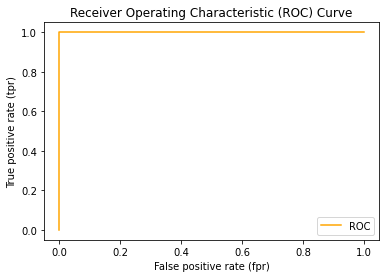

In [117]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [118]:
# Perfect AUC score
roc_auc_score(y_test, y_test)

1.0

**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence, giving you an idea where the model is getting confused.

In [119]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [120]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
            y_preds,
            rownames=["Actual Labels"],
            colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


In [121]:
22 + 7 + 8 + 24

61

In [122]:
len(X_test)

61

In [123]:
# How to install a conda package into the current environment from a Jupyter Notebook

# import sys
# !conda install --yes --prefix {sys.prefix} seaborn

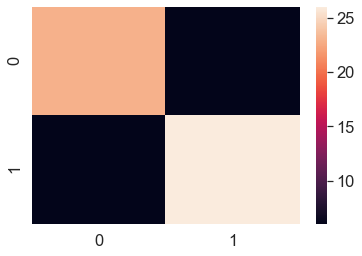

In [124]:
# Make our confusion matrix more visual with Seaborn's heaptmap()
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix 
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat);

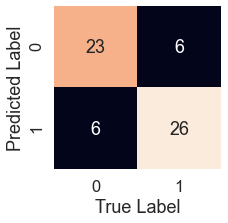

In [125]:
def plot_conf_mat(conf_mat):
    '''
    Plots a confusion matrix using Seaborn's heatmap().
    '''
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat,
                     annot=True, # Annotate the boes with conf_mat info
                     cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    
    # Fix the broken annotations (this happened in Matplotlib 3.1.1)
#     bottom, top = ax.get_ylim()
#     ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(conf_mat)

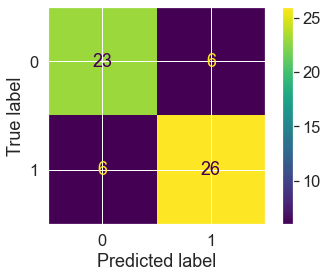

In [126]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf,X_test,y_test);

**Classification Report**

In [127]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [128]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one postive case

disease_preds = np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                   disease_preds,
                                   output_dict=True))

C:\Users\huynh\Anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


### 4.2.2 Regression model evaluation metrics

Model Evaluation documentation - https://scikit-learn.org/stable/modules/model_evaluation.html

1. R^2 (pronounced as r-squared) or coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

**R^2**

What R-squared does: Compares your models predictions to the mean  of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, it's R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

In [129]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train);

In [130]:
model.score(X_test, y_test)

0.8654448653350507

In [131]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [132]:
y_test.mean()

21.488235294117644

In [133]:
y_test_mean

array([21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48

In [134]:
# Model only predicting the mean gets an R^2 score of 0
r2_score(y_test, y_test_mean)

0.0

In [135]:
# Model predicting perfectly the correct values gets an R^2 score of 1
r2_score(y_test, y_test)

1.0

**Mean absolute error(MAE)**

MAE is the average of athe aboslute differences between predictions and actual values. It gives you an idea of how wrong your models predictions are.

In [136]:
# Mean absolute error
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

2.136382352941176

In [137]:
df = pd.DataFrame(data={"actual values": y_test,
                        "predicted values": y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df

,actual values,predicted values,differences
173,23.6,23.081,-0.519
274,32.4,30.574,-1.826
491,13.6,16.759,3.159
72,22.8,23.460,0.660
452,16.1,16.893,0.793
...,...,...,...
412,17.9,13.159,-4.741
436,9.6,12.476,2.876
411,17.2,13.612,-3.588
86,22.5,20.205,-2.295


**Mean squared error (MSE)**

In [138]:
# Mean squared error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

9.867437068627442

In [139]:
# Calculate MSE by hand
squared = np.square(df["differences"])
squared.mean()

9.867437068627442

### 4.2.3 Finallly using the `scoring` parameter

In [140]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()

In [142]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, scoring=None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [143]:
# Cross-validated accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [144]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, scoring="accuracy")
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [145]:
# Precision
cv_precision = cross_val_score(clf, X, y, scoring="precision")
np.mean(cv_precision)

0.8085601538512754

In [146]:
# Recall
cv_recall = cross_val_score(clf, X, y, scoring="recall")
np.mean(cv_recall)

0.8424242424242424

In [147]:
# f1
cv_f1 = cross_val_score(clf, X, y, scoring="f1")
np.mean(cv_f1)

0.841476533416832

How about our regression model?

In [148]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

model = RandomForestRegressor()

In [151]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, scoring=None)
np.mean(cv_r2)

0.6243870737930857

In [150]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, scoring="r2")
cv_r2

array([0.77231143, 0.86035935, 0.74664002, 0.47632078, 0.26630379])

In [153]:
# Mean absolute error
cv_mae = cross_val_score(model, X, y, scoring="neg_mean_absolute_error")
cv_mae

array([-2.13045098, -2.49771287, -3.45471287, -3.81509901, -3.11813861])

In [155]:
# Mean squared error
cv_mse = cross_val_score(model, X, y, scoring="neg_mean_squared_error")
np.mean(cv_mse)

-21.729149843894373

### 4.3 Using different evalution metrics as Scikit-Learn functions

**Classification evaluation functions**

In [156]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make some predictions
y_preds = clf.predict(X_test)

# Evaluate the classifier
print("Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"F1: {f1_score(y_test, y_preds)}")

Classifier metrics on the test set
Accuracy: 85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384615


**Regression evaluation functions**

In [158]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn. model_selection import train_test_split

np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions using our regression model
y_preds = model.predict(X_test)

# Evaluate the regression model
print("Regression model metrics on the test set")
print(f"R^2: {r2_score(y_test, y_preds)}")
print(f"MAE: {mean_absolute_error(y_test, y_preds)}")
print(f"MSE: {mean_squared_error(y_test, y_preds)}")

Regression model metrics on the test set
R^2: 0.8654448653350507
MAE: 2.136382352941176
MSE: 9.867437068627442


## 5. Improving a model

First predictions = baseline predictions
First model = baseline model

From a data perspective:
* Could we collect more data? (generally, the more data, the better)
* Could we imporve our data?

From a model perspective:
* Is there a better model we can use?
* Could we improve the current model?

Hyperparameters vs. Parameters

* Parameters = model find these patterns in data
* Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns

Three ways to adjust hyperparameters:
1. By hand
2. Randomly with RandomSerachCV
3. Exhaustively with GridSearchCV

In [159]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [160]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning hyperparameters by hand

Let's make 3 sets, training, validation, and test.

In [161]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We're going to try and adjust:
* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [168]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels on a classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1: {f1:.2f}")
    
    return metric_dict

In [169]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1) # frac=1 means we are using 100% of the data

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split the data into train, validation, and test sets
train_split = round(0.7*len(heart_disease_shuffled)) # 70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of data
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make baseline predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)

Accuracy: 82.22%
Precision: 0.81
Recall: 0.88
F1: 0.85


In [174]:
np.random.seed(42)

# Create a second classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train, y_train)

# Make predictions with different hyperparameters
y_preds_2 = clf_2.predict(X_valid)

# Evaluate the 2nd classifier
clf_2_metrics = evaluate_preds(y_valid, y_preds)

Accuracy: 82.22%
Precision: 0.81
Recall: 0.88
F1: 0.85


### 5.2 Hyperparameter tuning with RandomizedSearchCV

In [176]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

np.random.seed(42)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train an dtest sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=10, # number of models to try
                            cv=5,
                            verbose=2)

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.1s
[CV] n_estimators=100, min_samples_split=4, min_samp

[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.0s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   0.9s
[CV] n_estimators=1000, min_samples_split=4, min

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   16.4s finished


In [177]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [179]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Accuracy: 81.97%
Precision: 0.77
Recall: 0.86
F1: 0.81


### 5.3 Hyperparameter tuning with GridSearchCV

In [180]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [182]:
6*5*2*3*3*5

2700

In [183]:
grid_2 = {'n_estimators': [100, 200, 500],
          'max_depth': [None, 5, 10, 20, 30],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [26],
          'min_samples_leaf': [1, 2]}

In [184]:
3*1*2*1*2*5

60

In [185]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train an dtest sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid_2,
                      cv=5,
                      verbose=2)

# Fit the GridSearchCV version of clf
gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=26, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=26, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=26, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=26, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=26, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=26, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=26, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=26, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=26, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=26, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=26, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=26, n_estimators=200, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=26, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=26, n_estimators=200, total=   0.2s
[CV] max_depth=None, max_

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=26, n_estimators=500, total=   0.5s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=26, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=26, n_estimators=500, total=   0.5s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=26, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=26, n_estimators=500, total=   0.5s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=26, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=26, n_estimators=500, total=   0.5s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=26, n_estimators=100 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=26, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_

[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=26, n_estimators=200, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=26, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=26, n_estimators=200, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=26, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=26, n_estimators=200, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=26, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=26, n_estimators=200, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=26, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=26, n_estimators=200, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_lea

[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=26, n_estimators=100, total=   0.1s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=26, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=26, n_estimators=100, total=   0.1s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=26, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=26, n_estimators=100, total=   0.1s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=26, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=26, n_estimators=200, total=   0.2s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=26, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=26, n_estimators=200, total=   0.2s
[CV] max_depth=10, max_features=auto, min_s

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=26, n_estimators=500, total=   0.5s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=26, n_estimators=500 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=26, n_estimators=500, total=   0.5s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=26, n_estimators=500 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=26, n_estimators=500, total=   0.5s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=26, n_estimators=500 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=26, n_estimators=500, total=   0.5s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=26, n_estimators=100 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=26, n_estimators=100, total=   0.1s
[CV] max_depth=10, max_features=sqrt, min_s

[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=26, n_estimators=200, total=   0.2s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=26, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=26, n_estimators=200, total=   0.2s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=26, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=26, n_estimators=200, total=   0.2s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=26, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=26, n_estimators=200, total=   0.2s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=26, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=26, n_estimators=200, total=   0.2s
[CV] max_depth=20, max_features=auto, min_s

[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=26, n_estimators=500, total=   0.5s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=26, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=26, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=26, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=26, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=26, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=26, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=26, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=26, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=auto, min_s

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=26, n_estimators=200, total=   0.2s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=26, n_estimators=500 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=26, n_estimators=500, total=   0.5s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=26, n_estimators=500 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=26, n_estimators=500, total=   0.5s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=26, n_estimators=500 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=26, n_estimators=500, total=   0.5s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=26, n_estimators=500 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=26, n_estimators=500, total=   0.5s
[CV] max_depth=30, max_features=sqrt, min_s

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  1.2min finished


In [186]:
gs_clf.best_params_

{'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 26,
 'n_estimators': 200}

In [187]:
gs_y_preds = gs_clf.predict(X_test)

# Evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Accuracy: 83.61%
Precision: 0.76
Recall: 0.93
F1: 0.84


Let's compare our different models metrics.

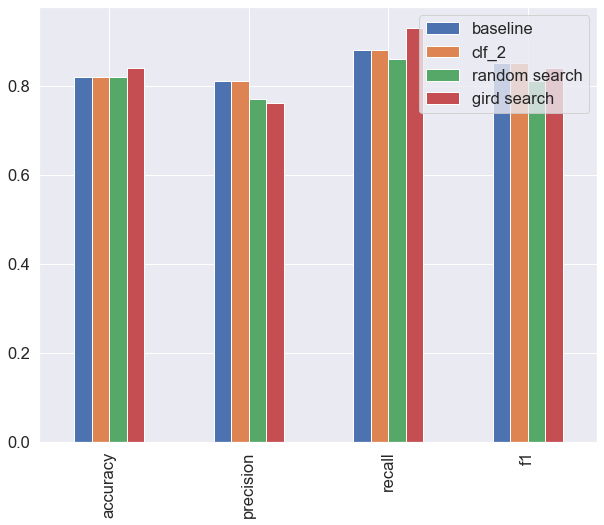

In [189]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "clf_2": clf_2_metrics,
                                "random search": rs_metrics,
                                "gird search": gs_metrics})

compare_metrics.plot.bar(figsize=(10, 8));

## 6. Saving and loading trained machine learning models

Two ways to save and load machine learning models:
1. With Python's `pickle` module
2. With the `joblib` module

**Pickle**

In [190]:
import pickle

# Save an existing module to file
pickle.dump(gs_clf, open("gs_random_forest_model_1.pk1", "wb"))

In [191]:
# Load a saved model
loaded_pickle_model = pickle.load(open("gs_random_forest_model_1.pk1", "rb"))

In [192]:
# Make some predictions
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Accuracy: 83.61%
Precision: 0.76
Recall: 0.93
F1: 0.84


{'accuracy': 0.84, 'precision': 0.76, 'recall': 0.93, 'f1': 0.84}

**Joblib**

In [193]:
from joblib import dump, load

# Save model to file
dump(gs_clf, filename="gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [196]:
# Import a saved joblib model
loaded_joblib_model = load(filename="gs_random_forest_model_1.joblib")

In [198]:
# Make and evaluate joblib predictions
joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

Accuracy: 83.61%
Precision: 0.76
Recall: 0.93
F1: 0.84


{'accuracy': 0.84, 'precision': 0.76, 'recall': 0.93, 'f1': 0.84}

## 7. Putting it all together!

In [199]:
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [200]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [201]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we want to do (all in one cell):
1. Fill missing data
2. Convert dat to numbers
3. Build a model on the data

In [204]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data nad drop rows with missing labels
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

# Define different features and transformer pipeline
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

door_features = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))
])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(transformers=[
    ("cat", categorical_transformer, categorical_features),
    ("door", door_transformer, door_features),
    ("num", numeric_transformer, numeric_features)
])

# Creating a preprocessing and modeling pipeline
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor())
])

# Split data
X = data.drop("Price", axis=1)
y = data["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875

It's also possible to use `GridSearchCV` or `RandomizedSearchCV` with our `Pipeline`

In [205]:
# Use GridSearchCV with our regression Pipeline
from sklearn.model_selection import GridSearchCV

pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 1000],
    "model__max_features": ["auto"],
    "model__min_samples_split": [2, 4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.2s
[CV] model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.2s
[CV] model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.2s
[CV] model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.2s
[CV] model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.2s
[CV] model__max_features=auto, model__min_samples_s

[CV]  model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean, total=   1.4s
[CV] model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean, total=   1.4s
[CV] model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean, total=   1.4s
[CV] model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   1.4s
[CV] model__max_features=auto, model__mi

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   33.4s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
         

In [206]:
gs_model.score(X_test, y_test)

0.2499916895296872